<a href="https://colab.research.google.com/github/GraceNzambi/Absenteeism_prediction/blob/main/Housing_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
df = pd.read_csv("sample_data/california_housing_train.csv")
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
df_test = pd.read_csv('sample_data/california_housing_test.csv')
df_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.shape

(17000, 9)

In [ ]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


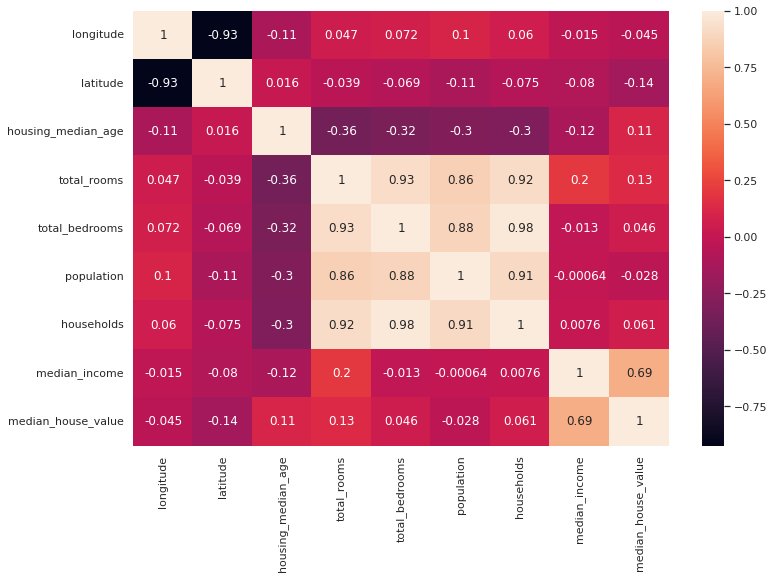

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,8))
df_corr= sns.heatmap(df[top_corr_features].corr(), annot = True);


Median income is highly correlated to the target variable

The longitude and latitude have an inverse relationship with the target variable

The total bedrooms and toal rooms features are correlated indicated multicollinearity, hence it is important to do away withn total rooms feature(logic). Same case applies to the households and the population.




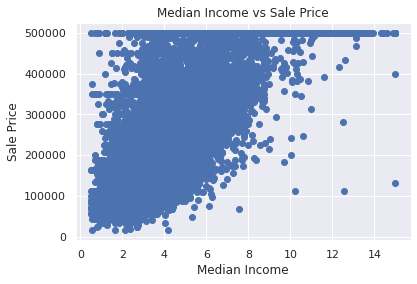

In [ ]:
plt.scatter(df['median_income'], df['median_house_value'])
plt.title('Median Income vs Sale Price')
plt.xlabel('Median Income')
plt.ylabel('Sale Price')
plt.show()


There is a positive correlation between the median_income and the house price.
People earning high income buy more expensive houses

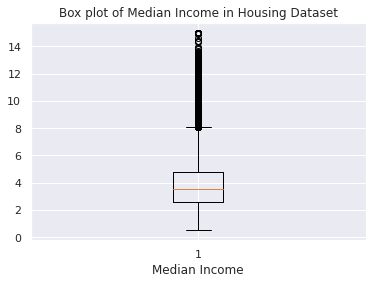

In [ ]:
ig, ax = plt.subplots()

# Create the box plot
ax.boxplot(df['median_income'])

# Set the axis label and title
ax.set_xlabel('Median Income')
ax.set_title('Box plot of Median Income in Housing Dataset')

# Show the plot
plt.show()

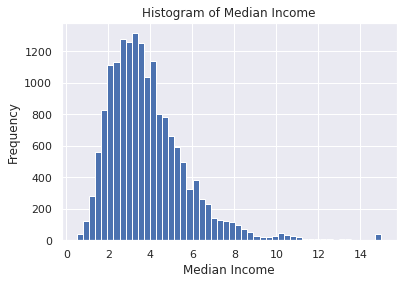

In [ ]:
# Plot histogram of median_income
df['median_income'].hist(bins=50)

# Add labels and title
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.title('Histogram of Median Income')
plt.show()

Normalizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler

# creating an instance of the standardscaler class and fit the data
scaler= StandardScaler()
scaled_features = scaler.fit_transform(df)

scaled_test = scaler.fit_transform(df_test)
columns = df.columns

# convert the numpy array back to a Dataframe
df1_scaled = pd.DataFrame(scaled_features, columns= columns)
df2_scaled = pd.DataFrame(scaled_test, columns= columns)
#print the scaled dataframe
df1_scaled.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,2.619365,-0.671520,-1.079671,1.361695,1.764204,-0.361184,-0.075998,-1.252543,-1.210558
1,2.539569,-0.573264,-0.761872,2.296608,3.230441,-0.261865,-0.099404,-1.081483,-1.096745
2,2.494683,-0.905463,-0.920772,-0.882462,-0.866956,-0.955354,-0.999252,-1.170105,-1.048461
3,2.489696,-0.928857,-1.159121,-0.524186,-0.480230,-0.796793,-0.715774,-0.362600,-1.154514
4,2.489696,-0.961609,-0.682422,-0.545747,-0.506328,-0.701830,-0.622148,-1.026454,-1.222629


In [ ]:
df2_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.233729,0.814633,-0.147000,0.596418,0.315337,0.130246,0.317734,1.510745,1.227699
1,0.646344,-0.645931,1.127565,-0.505550,-0.529255,-0.576296,-0.582743,-0.112324,-0.259470
2,0.892007,-0.871356,-0.147000,0.459078,-0.055225,0.078808,0.013926,1.071149,0.571647
3,0.616263,-0.852570,-0.067340,-1.175083,-1.239098,-1.313894,-1.310788,1.255865,1.097726
4,-0.040509,0.326213,-0.784282,-0.630362,-0.688068,-0.536504,-0.692223,-0.469081,-1.097660


In [ ]:
# defining the target variables and features for the train data
x= df1_scaled.iloc[:,0:8]
y= df1_scaled.iloc[:,-1]

# defining the target variables and features for the test data
x_test = df2_scaled.iloc[:,0:8]
y_test = df2_scaled.iloc[:,-1]

## **Feature Engineering**

In [ ]:

from sklearn. ensemble import RandomForestRegressor
# creating an instance of a randomforestregressor model
model= RandomForestRegressor(n_estimators =100)

# fitting the model
model.fit(x, y)

# extracting the feature importance
feature_importances = pd.Series(model.feature_importances_, index=x.columns)
sorted_scores = feature_importances.sort_values(ascending =False)

# converting back to a DataFrame
feat_scores =pd.DataFrame({"Features": sorted_scores.index, "Importance Score":sorted_scores.values})

# printing the scores
feat_scores





,Features,Importance Score
0,median_income,0.517467
1,longitude,0.166395
2,latitude,0.153871
3,housing_median_age,0.059332
4,population,0.034153
5,total_bedrooms,0.024707
6,total_rooms,0.024243
7,households,0.019832


Median_income has the highest correlation withn the target variable, hence it is the most important.
The total rooms and households have a less impact to the model

**Visualizing the feature_importances**



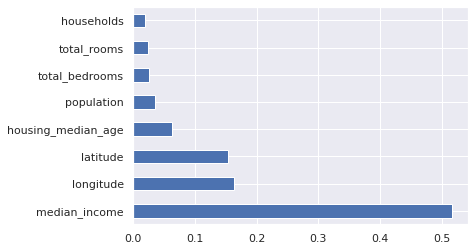

In [ ]:

feature_importances.nlargest(10).plot(kind="barh")
plt.show()

# Model Training

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# creating an instance of the linearRegresion class and fit in the model

model = LinearRegression()
model.fit(X_train, y_train)

# predicting the target variable for the train data
y_pred = model.predict(X_test)

# evaluating the model using mse
mse_train = mean_squared_error(y_test, y_pred)
mse_train


0.34454732102885754

DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# initializing the decision tree regressor and fit it to the training data
regressor = DecisionTreeRegressor(max_depth = 10)
regressor.fit(X_train, y_train)

# Making predictions on the test data
y_pred = regressor.predict(X_test)

# evaluating the performance of the mode using MSE
mse= mean_squared_error(y_test, y_pred)
print("Mean squared error", mse)

Mean squared error 0.2972278174393492


RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# initialize the random forest regressor and fit it to the training data
model = RandomForestRegressor(n_estimators=100, max_depth = 10, random_state=42)
model.fit(X_train, y_train)

# use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# evaluating the performance of the model using the mse
mse = mean_squared_error(y_test, y_pred)
print(" Mean squared error", mse)


 Mean squared error 0.21165145968519697


GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


# initialize the gradient boosting regressor and fit it to the training data
model_gradient = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth= 3, random_state=42)
model_gradient.fit(X_train, y_train)

# use the trained model to make predictions on the test data
y_pred = model_gradient.predict(X_test)

# evaluate the perfomance of the model using using mse
mse = mean_squared_error(y_test, y_pred)
print(" Mean squared error", mse)




 Mean squared error 0.22027746482846836


Support Network Regression

In [ ]:
from sklearn.svm import SVR

# initialize the SVR and fit it to the training data
model_SVR = SVR(kernel="rbf", C=100, epsilon=0.1)# using the rbf that speciifies a radial basis function kernel
model_SVR.fit(X_train, y_train)

#use the trained model to make predictions on the test data
y_pred = model_SVR.predict(X_test)

# evaluate the performance of the model using mse

mse= mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)


Mean squared error: 0.21976977622986774


In this example, we use the SVR class from scikit-learn to implement support vector regression. We set the kernel parameter to 'rbf', which specifies a radial basis function kernel, the C parameter to 100, which controls the trade-off between maximizing the margin and minimizing the classification error, and the epsilon parameter to 0.1, which sets the margin of tolerance around the hyperplane.

## **Using a Function  for the Models**


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


def run_regression_models(df1_scaled, df2_scaled):

  # Dictionary to store mean squared error values
    mse_dict = {}

  # Linear Regression
    print('Linear Regression:')
    regressor = LinearRegression()
    regressor.fit(x, y)
    y_pred = regressor.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_dict['Linear Regression'] = mse
    print('Mean squared error:', mse)

    # Decision Tree Regression
    print('Decision Tree Regression:')
    regressor = DecisionTreeRegressor(max_depth = 10)
    regressor.fit(x, y)
    y_pred = regressor.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_dict['Decision Tree Regression'] = mse
    print('Mean squared error:', mse)

    # Random Forest Regression
    print('Random Forest Regression:')
    regressor = RandomForestRegressor(n_estimators=100, max_depth = 10, random_state=42)
    regressor.fit(x, y)
    y_pred = regressor.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_dict['Random Forest Regression'] = mse
    print('Mean squared error:', mse)

    # Gradient Boosting Regression
    print('Gradient Boosting Regression:')
    regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth= 3, random_state=42)
    regressor.fit(x, y)
    y_pred = regressor.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_dict['Gradient Boosting Regression'] = mse
    print('Mean squared error:', mse)

    # Support Vector Regression
    print('Support Vector Regression:')
    regressor = SVR(kernel="rbf", C=100, epsilon=0.1)
    regressor.fit(x, y)
    y_pred = regressor.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_dict['Support Vector Regression'] = mse
    print('Mean squared error:', mse)

     #Plot mean squared error values
    plt.figure(figsize=(10, 5))
    plt.bar(mse_dict.keys(), mse_dict.values())
    plt.title('Mean Squared Error for Regression Models')
    plt.xlabel('Regression Models')
    plt.xticks(rotation=24)
    plt.ylabel('Mean Squared Error')
    plt.show()

    return mse_dict


Linear Regression:
Mean squared error: 0.3807106933090813
Decision Tree Regression:
Mean squared error: 0.33643406859657876
Random Forest Regression:
Mean squared error: 0.25549902981439815
Gradient Boosting Regression:
Mean squared error: 0.2519542001241849
Support Vector Regression:
Mean squared error: 0.24800298559421927


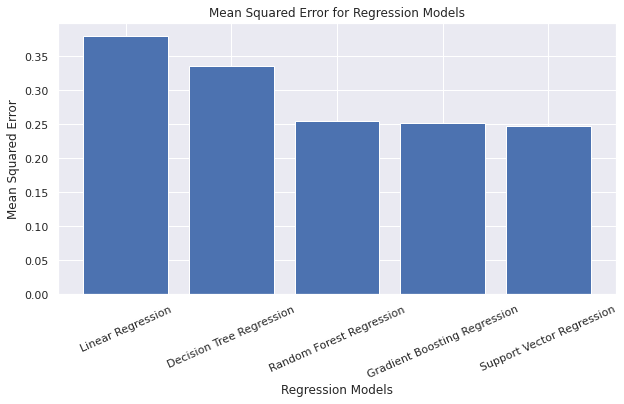

{'Linear Regression': 0.3807106933090813,
 'Decision Tree Regression': 0.33643406859657876,
 'Random Forest Regression': 0.25549902981439815,
 'Gradient Boosting Regression': 0.2519542001241849,
 'Support Vector Regression': 0.24800298559421927}

In [ ]:
run_regression_models(df1_scaled, df2_scaled)


Support Vector Regression has the lowest MSE.

Visualizing the the sale prices and the predicted prices

> Indented block



Linear Regression:
Mean squared error: 0.3807106933090813
Decision Tree Regression:
Mean squared error: 0.3363369930945395
Random Forest Regression:
Mean squared error: 0.25549902981439815
Gradient Boosting Regression:
Mean squared error: 0.2519542001241849
Support Vector Regression:
Mean squared error: 0.24800298559421927


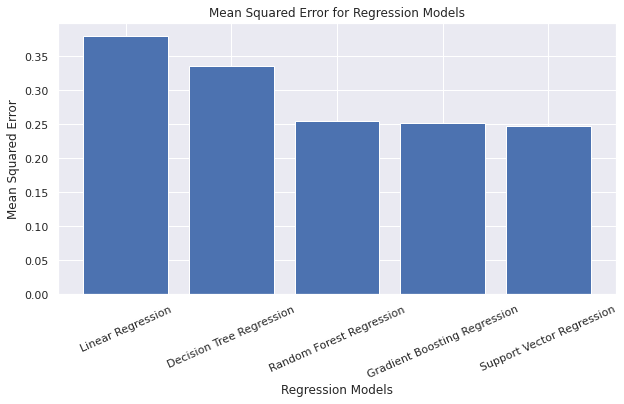

IndexError: ignored

In [ ]:
mse_dict = run_regression_models(df1_scaled, df2_scaled)
linear_regression_results = mse_dict['Linear Regression']
y1_pred = linear_regression_results['y_pred']
plt.scatter(y_test, y1_pred)
plt.title('Linear Regression: True vs. Predicted Sale Prices')
plt.xlabel('True Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.show()


In [ ]:
print(mse_dict.keys())

dict_keys(['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Gradient Boosting Regression', 'Support Vector Regression'])
